### pipeline for this task is below:
1. load data and split feature & label;
2. split train_data and validate_data, scale feature into range 0~1;
3. build convnet using keras
4. train model & evaludation
5. make prediction on test data

### 1.load data and split feature & label

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [31]:
# load data and split features and labels
df = pd.read_csv("data/digit_recognizer/train.csv")
test_df = pd.read_csv("data/digit_recognizer/test.csv")
label = df["label"].get_values()
df = df.drop("label", axis=1)
train_data = df.get_values()
test_data = df.get_values()

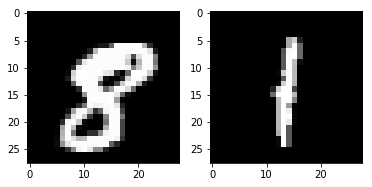

In [41]:
# show image
img_data = train_data[10,:].reshape(28,28)
test_img_data = test_data[12,:].reshape(28,28)
plt.subplot(1,2,1)
plt.imshow(img_data, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(test_img_data, cmap="gray")
plt.show()

### 2. split train_data and validate_data

In [43]:
train_data.shape

(42000, 784)

In [ ]:
# convert label one vetor to one-hot-encode


In [54]:
# split into train_data and validate_data
x_train, x_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.2)

### 3. build convnet
The model architecure is Input(28,28,1) -> Conv(28,28,8) -> Maxpooling(14,14,8) -> BatchNormalization -> Conv(14,14,32) -> Maxpooling(7,7,32) -> BatchNormalization -> FullConnect(256) -> BatchNormalization -> FullConnect(64) -> Output(10)

In [79]:
from keras.models import Model
from keras.layers import Input, Reshape, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.utils import to_categorical

In [76]:
# input layer
input_ = Input(shape=(784,))
input_image = Reshape((28,28,1))(input_)

# conv layers
conv1 = Conv2D(8, (4,4), strides=(1,1), padding="same")(input_image)
conv1 = MaxPooling2D(pool_size=(2, 2), strides=(2,2) ,padding="same")(conv1)

conv2 = Conv2D(32, (4,4), strides=(1,1), padding="same")(conv1)
conv2 = MaxPooling2D(pool_size=(2, 2), strides=(2,2) ,padding="same")(conv2)

flatten_conv = Flatten()(conv2)
flatten_conv = Dropout(0.8)(flatten_conv)

# full connect layers
f1 = Dense(256, activation="relu")(flatten_conv)
f1 = Dropout(0.5)(f1)

f2 = Dense(64, activation="relu")(f1)
f2 = Dropout(0.5)(f2)

output = Dense(10, activation="softmax")(f2)

model = Model(inputs=input_, outputs=output)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

In [80]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model.fit(x_train, y_train, batch_size=128, epochs=1, validation_data=(x_test, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/1
33600/33600 [==============================] - 30s - loss: 13.3155 - acc: 0.1673 - val_loss: 9.9245 - val_acc: 0.3787